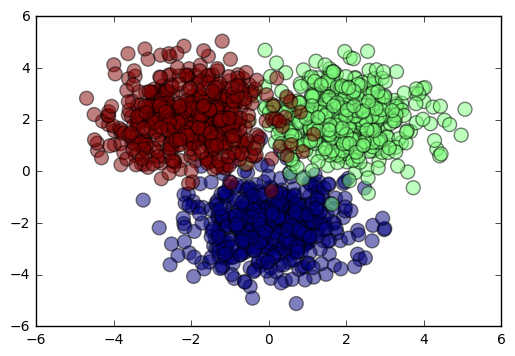

Cost: -2054.48955983 Classification Rate: 0.5073333333333333
Cost: -1997.94128111 Classification Rate: 0.5206666666666667
Cost: -1943.78268001 Classification Rate: 0.5286666666666666
Cost: -1892.01264494 Classification Rate: 0.5366666666666666
Cost: -1842.61845295 Classification Rate: 0.5413333333333333
Cost: -1795.57472681 Classification Rate: 0.5493333333333333
Cost: -1750.84290765 Classification Rate: 0.5626666666666666
Cost: -1708.37127821 Classification Rate: 0.574
Cost: -1668.09553071 Classification Rate: 0.582
Cost: -1629.93983487 Classification Rate: 0.5906666666666667
Cost: -1593.81832702 Classification Rate: 0.5986666666666667
Cost: -1559.63691663 Classification Rate: 0.6033333333333334
Cost: -1527.29529151 Classification Rate: 0.606
Cost: -1496.68900014 Classification Rate: 0.6086666666666667
Cost: -1467.71149743 Classification Rate: 0.6126666666666667
Cost: -1440.25605704 Classification Rate: 0.6166666666666667
Cost: -1414.21747582 Classification Rate: 0.6206666666666667
Co

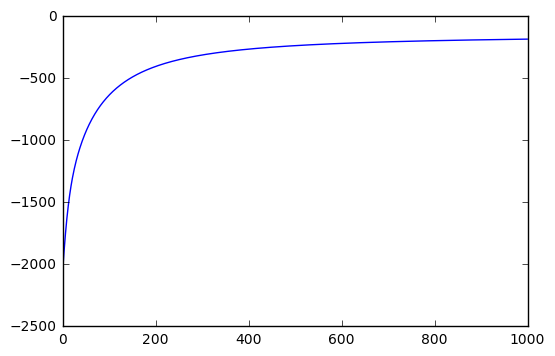

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def forward(X,W1,b1,W2,b2):
    Z = 1/(1+np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA/expA.sum(axis = 1, keepdims = True)
    return Y,Z

#determine the classification rate 
def classification_rate(Y,P):
    n_correct = 0 
    n_total = 0 
    for i in range(len(Y)):
        n_total +=1
        if Y[i] == P[i]:
            n_correct +=1
    return float(n_correct)/n_total

def derivative_w2(Z,T,Y):
    N, K = T.shape
    M = Z.shape[1]
    
    #slow way
#     ret1 = np.zeros((M,K))
#     for n in range(N):
#         for m in range(M):
#             for k in range(K):
#                 ret1[m,k] += (T[n,k] - Y[n,k]*Z[n,m])

#     ret2 = np.zeros((M,K))
#     for n in range(N):
#         for k in range(K):
#             ret2[:,k] += (T[n,k]-Y[n,k])*Z[n,:]
    #assert(np.abs(ret1-ret2).sum()<10e-10)
    
#     ret3 = np.zeros((M,K))
#     for n in range(N):
#         ret3+= np.outer(Z[n],T[n] - Y[n])
    
#     ret4 = Z.T.dot(T-Y) #Z.T MxM Y NxK
    
    return Z.T.dot(T-Y)

def derivative_b2(T,Y):
    return (T-Y).sum(axis=0)

def derivative_w1(X,Z,T,Y,W2):
    N,D = X.shape
    M,K = W2.shape
    
    #slow
#     ret1 = np.zeros((D,M))
#     for n in range(N):
#         for k in range(K):
#             for m in range(M):
#                 for d in range(D):
#                     ret1[d,m] += (T[n,k]-Y[n,k])*W2[m,k]*Z[n,m]*(1-Z[n,m])*X[n,d]
#     return ret1

    dZ = (T-Y).dot(W2.T)*Z*(1-Z)
    return X.T.dot(dZ)
    
def derivative_b1(T,Y,W2,Z):
    #fast
    return ((T-Y).dot(W2.T)*Z*(1-Z)).sum(axis=0)
                                  
def cost(T,Y):
    tot = T * np.log(Y)
    return tot.sum()

def main():
    
    Nclass = 500
    D = 2 #dimensions
    M = 3 #hidden layer size
    K = 3 #number of classes
    
    X1 = np.random.randn(Nclass,2) + np.array([0,-2])
    X2 = np.random.randn(Nclass,2) + np.array([2,2])
    X3 = np.random.randn(Nclass,2) + np.array([-2,2])
    X = np.vstack([X1,X2,X3])

    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
    N = len(Y)
    
    #one hot encoding
    T = np.zeros((N,K))
    for i in range(N):
        T[i,Y[i]] = 1
    
    plt.scatter(X[:,0],X[:,1],c=Y,s=100,alpha=0.5)
    plt.show()
    
    #random initialize weights
    W1 = np.random.randn(D,M)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M,K)
    b2 = np.random.randn(K)
    
    learning_rate = 10e-7
    #plot afterwards to see progression
    costs = []
    for epoch in range(100000):
        output, hidden = forward(X,W1,b1,W2,b2) #return hidden layer
        if epoch % 100 == 0:
            c = cost(T,output)
            P = np.argmax(output, axis=1)
            r = classification_rate(Y,P)
            print("Cost:",c, "Classification Rate:",r)
            costs.append(c)
        #gradient ascent
        W2 += learning_rate * derivative_w2(hidden,T,output)
        b2 += learning_rate * derivative_b2(T, output)
        W1 += learning_rate * derivative_w1(X,hidden,T,output,W2)
        b1 += learning_rate * derivative_b1(T,output,W2,hidden)
        
    plt.plot(costs)
    plt.show()

if __name__ == '__main__':
    main()

In [10]:
#cost is decreasing but very slowly
#progress